In [19]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

### 目标图表形式

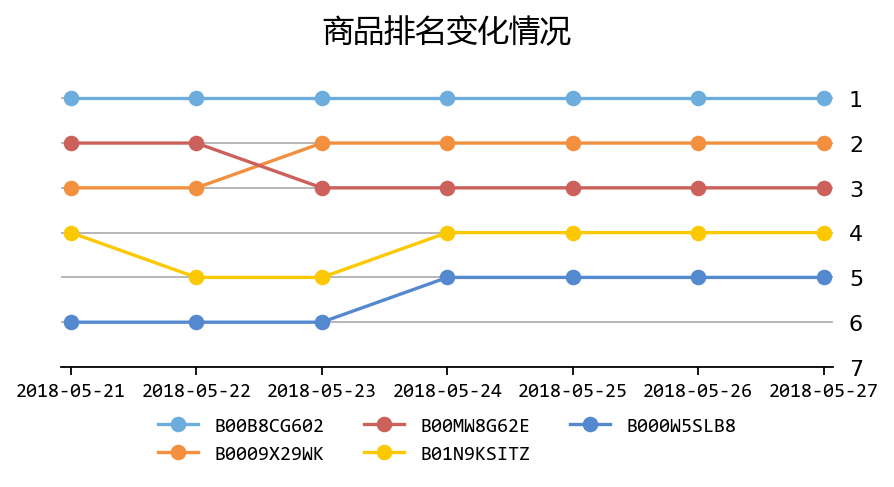

In [3]:
Image('./source/multi_line.png')

In [20]:
data = pd.DataFrame(
np.array([[1, 3, 2, 4, 6],
       [1, 3, 2, 5, 6],
       [1, 2, 3, 5, 6],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]]),
columns = ['B00B8CG602', 'B0009X29WK', 'B00MW8G62E', 'B01N9KSITZ', 'B000W5SLB8'],
index = ['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', 
         '2018-05-25', '2018-05-26', '2018-05-27']
)

In [21]:
data

,B00B8CG602,B0009X29WK,B00MW8G62E,B01N9KSITZ,B000W5SLB8
2018-05-21,1,3,2,4,6
2018-05-22,1,3,2,5,6
2018-05-23,1,2,3,5,6
2018-05-24,1,2,3,4,5
2018-05-25,1,2,3,4,5
2018-05-26,1,2,3,4,5
2018-05-27,1,2,3,4,5


### 继承模板
观察多线图和上一章中柱形图的差异，可以发现以下结构有不同：

- 画图方式
- Tick显示
- Legend在下侧
- y轴的 Major tick 和 Major tick label在右侧，且顺序为逆

所以在这些部分我们需要进行相关的自定义

In [27]:
%run Images.py

# 使用generator : cycle， 循环迭代
from itertools import cycle
class ImageMultiLine(Image):
    # 定义不同线的颜色选择
    color_cycle = cycle(['blue', 'orange', 'red', 'lightyellow', 'royalblue'])

    def plot(self):
        # 定义多线图中线的形状
        self.marker_style = []
        for asin in self.y.columns:
            data = self.y[asin]
            marker_style = dict(color=self.default_colors[next(self.color_cycle)], 
                                linestyle='-', marker='o')
            self.marker_style.append(marker_style)
            self.ax.plot(self.x, data, zorder=3, label=asin, **marker_style)
            
    # 设置y轴标签    
    def set_yticks(self):
        self.ax.yaxis.tick_right()

    def set_tick_marks(self):
        self.ax.tick_params(axis='both', zorder=1, which='both', bottom=True, top=False, 
                labelbottom=True, left=False, right=False, labelleft=True)

        
    # 设置Legend
    def add_legend(self):
        handles, labels = self.ax.get_legend_handles_labels()
        self.ax.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.4), prop=self.legend_font, frameon=False)
        
    def config_add(self):
        self.set_yticks()
        # tick_marks 需要在设置yticks后再次设置，因为set_yticks会重新生成ticks，之前所做的设置就无效了
        self.set_tick_marks()
        data_max = self.y.max().max()
        # 设置y轴上限，为图表显示留出空间
        if round(data_max*1.1)-round(data_max)>1:
            top = round(data_max*1.1)
        else:
            top = round(data_max)+1
        self.ax.set_ylim(top=top)

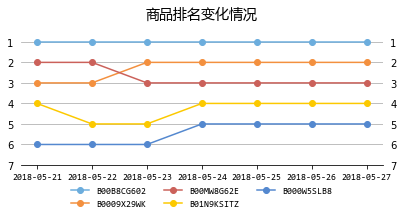

In [28]:
image = ImageMultiLine(data=data,
               labels=data.index,
               title='商品排名变化情况',
               xticks_rotation=0,
               title_y = 1.1
              )
image.init()
if image.intervals<1:
    image.intervals = 1
image.init()
image.ax.invert_yaxis()
image.fig

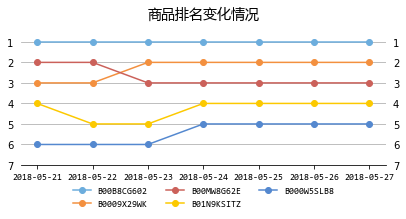

In [69]:
image.ax.tick_params(axis='both', which='both', bottom=True, top=False, 
        labelbottom=True, left=False, right=False, labelleft=True)
image.fig

### 作业1：做出下图
Tip : 绘图方法为fill_between

#### 数据

In [33]:
data = range(9)

In [34]:
%run Images.py
class ImageFill(Image):
    def plot(self):
        self.ax.fill_between(self.x, min(self.y)*0.9, 
                self.y, zorder=3, color=self.default_colors['blue'])   
        
    def set_spines(self):
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['bottom'].set_visible(False)
        self.ax.spines['left'].set_visible(False)

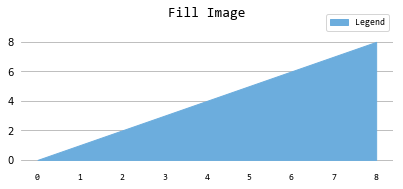

In [46]:
image = ImageFill(data = data, 
                 labels = data,
                 title = 'Fill Image',
                 legend_name = ['Legend'])

image.init()
image.fig

In [41]:
a = None
if a is not None:
    print('hh')

### 作业2： 增强模板的鲁棒性
模板还有很多缺陷，比如title为空，legend为空，labels为空等，都会出现错误，请加入在不同输入时的提醒和处理